# TASEPy Demonstration

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from TASEPy import psa_compute

from TASEPy import compute_profiles
from TASEPy import mean_density
from TASEPy import current


ImportError: cannot import name 'local_density' from 'TASEPy' (/Users/lucaciandrini/Documents/GitHub/TASEPy/demos/TASEPy.py)

We consider a small system with the following parameters
*  $L = 4$, Lattice length of $4$.
*  $\omega = [1.88,1.52, 1.09,1.38]$, hopping rate for each site $i$.
*  $\ell = 1$, ribosome size or amount of sites a partsome occupies.
*  $n = 4$, maximal order of approximation performed. 

Note that the effective $\omega_{i}$ for ribosomes with $\ell>1$ is the rate at the reading site.



In [10]:
l = 10
K = 4
wlist = [1.88, 1.52, 1.09, 1.38]
L=len(wlist)

In [11]:
R, Jc = psa_compute(wlist, K, l)

In [12]:
print('R =', R)

print('Jc = ', Jc)


R = [[0, 0.5319148936170213, -1.5063183533399453, 4.265710565424477, -12.079974055701813], [0, 0.6578947368421053, -1.8630779633415113, 5.276010436182906, -14.941020542578556], [0, 0.9174311926605504, -2.598053673650548, 7.357372351374328, -20.835184609834318], [0, 0.7246376811594204, -2.0520858726660127, 5.811257871737694, -16.456776249796672]]
Jc =  [1, -2.8318785042790973, 8.019535862998017, -22.710351224719407, 64.31295545791136]


In [13]:
# set alpha
alpha = 0.2

profile = compute_profiles(R, alpha)


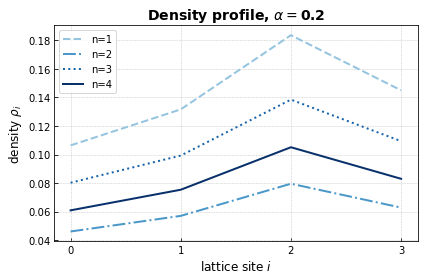

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm


# Choose a colormap (you can change it to your preferred one)
color_map = cm.get_cmap('Blues')


# Create a new figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']

n = 0
for p in profile:

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    if n != 0:
        ax.plot(profile[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    n += 1

# Set the x and y axis labels
ax.set_xlabel(r'lattice site $i$', fontsize=12)
ax.set_ylabel(r'density $\rho_i$', fontsize=12)

# Set the title
ax.set_title(r'Density profile, $\alpha = $' +
             str(alpha), fontsize=14, fontweight='bold')

# Customize the tick parameters
ax.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add a legend
ax.legend(fontsize=10)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('figure_density.pdf', dpi=300)

# Show the plot
plt.show()


In [15]:
# define a list with values of alpha to be computed
alpha_list = np.linspace(0., 0.5, 100)

# define empty lists where values of rho and J will be saved
# (for the corresponding alpha and for any order):
# rho_alpha[n] will contain rho(alpha) for the order n,...
rho_alpha = []
J_alpha = []


is_first = True

for alpha in alpha_list:

    profile = compute_profiles(R, alpha)

    for n in range(K+1):

        if is_first:
            rho_alpha.append([])
            J_alpha.append([])
            if n == K:
                is_first = False

        rho = mean_density(profile[n])
        rho_alpha[n].append(rho)

    J = current(Jc, alpha)
    
    n=0
    for j in J:
        J_alpha[n].append(j)
        n += 1


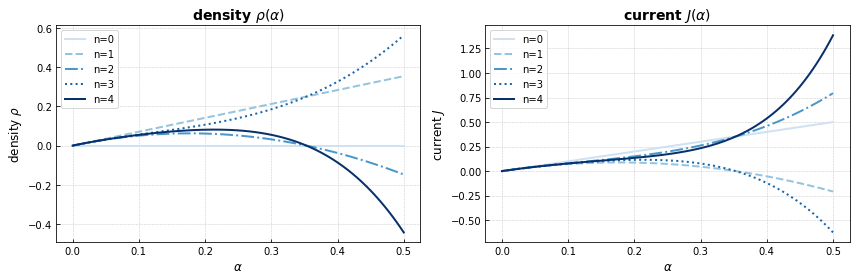

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm


# Choose a colormap (you can change it to your preferred one)
color_map = cm.get_cmap('Blues')


# Create a new figure and axes for subfigure 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']




#### PLOT DENSITY
#n = 0
for n in range(K+1):

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    #if n != 0:
    ax1.plot(alpha_list, rho_alpha[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    #n += 1

# Set the x and y axis labels
ax1.set_xlabel(r'$\alpha$', fontsize=12)
ax1.set_ylabel(r'density $\rho$', fontsize=12)

# Set the title
ax1.set_title(r'density $\rho(\alpha)$', fontsize=14, fontweight='bold')

# Customize the tick parameters
ax1.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
#ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add a legend
ax1.legend(fontsize=10)

# Add gridlines
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)




#### PLOT CURRENT


for n in range(K+1):

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    #if n != 0:
    ax2.plot(alpha_list, J_alpha[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    #n += 1

# Set the x and y axis labels
ax2.set_xlabel(r'$\alpha$', fontsize=12)
ax2.set_ylabel(r'current $J$', fontsize=12)

# Set the title
ax2.set_title(r'current $J(\alpha)$', fontsize=14, fontweight='bold')

# Customize the tick parameters
ax2.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
#ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add gridlines
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Add a legend
ax2.legend(fontsize=10)




# Save the plot as a high-resolution image
plt.savefig('figure_density_current.pdf', dpi=300)

# Show the plot
plt.show()


## 1. Generate the ordered set $S$ of configurations $\mathcal(X)$.

Here we call the method `psa_configs(lattice_length = L, ribosome_size = l, nth_order = n, print_output=False)`. 'print_output' is an optional parameter with a default value of True. If you do not want to print each iteration, set its value to 'False' as in this example.

This method calls two subfunctions modifying the lattice configuration $X = [x_1,...,x_n]$ in order to generate the configurations in the right order for the iterative PSA approach.
*   `particle_ejector`$(X)$ iteratively moves the rightmost particle till it is ected from the lattice, and save all the intermediates configurations in $S$.
*   `particle_elevator`$(X)$ moves one site to the right the particle preceeding the particle that has just been ejected, and stacks as many particles as it is possible (provided that the total number of particle is smaller than the order of the approximation) to its right.

The iterative application of these functions allows to create the set $S$ of configurations, in the correct order for the iterative PSA solution.


**NOTE!!**

The following assumptions were made:

*   If $\ell > 1$ is **odd**, the reading-site is the central ribosomal subunit $(\frac{\ell}{2} + \frac{1}{2})$.
*   If $\ell > 1$ is **even**, the reading-site is the $\frac{\ell}{2}+1$ ribosomal subunit.
*   At **initiation**, reading site starts at site $i = 1$. **I've corrected that, it was 0**

In [ ]:
S = psa_configs(lattice_length=L, ribosome_size=l,
                nth_order=K, print_output=False)


In [ ]:
S.head()


## 2. Update the set $S$ to include all the PSA coefficients $c_n(X)$.

This is the core of the algorithm. It computes all the coefficients $c_n(X)$ that are necessary to evaluate the particle current, density profiles and average density in the PSA for any value of $\alpha$.

To compute all the coefficients $c_n(X)$ for $n=0,\dots,K$, we call the method `psa_coeffs(df_configs = S, wlist = wlist, L=L, l=l)`. It takes as input the order set $S$ and modifies it adding a column for the PSA coefficients $c_n(X)$ for all configurations $X$ (rows).
`print_output` is an optional parameter with a default value of False. If you want to check each iteration, set its value to `True`.

In [ ]:
S_coefficients = psa_coeffs(df_configs=S, wlist=wlist, L=L, l=l)


In [ ]:
S_coefficients


## 3. Compute the coefficients $J_n$ for current series expansion
We now compute the coefficients $J_n$, $n=0,\dots,K$, necessary to compute the particle current $J$ for any given value of $\alpha$ following Eq.(25a) of the accompanying paper that we report here:
\begin{equation}
J=\sum_{n=0}^{K}J_{n}\alpha^{n+1}\quad J_0=1,\quad J_n=c_{n-1}(\emptyset)+\sum_{\substack{C\\x_1\geq \ell+1}}c_{n-1}(C),\quad n\geq 1 \tag{25a}
\end{equation}

The `psa_solve_J` module takes as input the dataframe `S_coefficients`, the maximal order $K$ computed for the approximation, the size of the particle $\ell$ (optional, $\ell=1$ by default). It returns a list $J_c = [J_0, \dots, J_K]$ of coefficients that will be used in Eq.(1) to compute $J(\alpha)$; this output is written in the file indicated in `file_path`, which is an optional argument of the function (if the path is not specified, the output is not written in a file).

In [ ]:
output_file = 'J_coeff_L' + str(L) + '_l' + str(l) + '.csv'
print('Write the output in ', output_file)

Jc = psa_solve_J(S_coefficients, K=K, file_path=output_file)

print('Jc = ', Jc)


## 4. Compute the coefficients $\rho_{i,n}$ for current series expansion
We now compute the coefficients $\rho_{i,n}$, for each site $i=1,\ldots,L$ and order of the PSA $n=0,\dots,K$. 
We follow Eq.(25b) to obtain these coefficients, and use Eqs.(25b)-(25c) of the accompanying paper to derive density profiles and average densities:

\begin{equation}
    \rho_i=\sum_{n=0}^{\infty}\rho_{i,n}\alpha^n,\quad \rho_{i,0}=0,\quad \rho_{i,n}=\sum_{\substack{C\\\tau_i=1}}c_n(C),\quad n\geq 1, \tag{25b}
\end{equation}

\begin{equation}
    \rho=\sum_{n=0}^{\infty}\rho_n \alpha^n,\quad \rho_0=0,\quad \rho_n=\frac{1}{L}\sum_{i=1}^{L}\sum_{\substack{C\\\tau_i=1}}c_n(C),\quad n\geq 1. \tag{25c}
\end{equation}


<!-- The `psa_solve_J` module takes as input the dataframe `S_coefficients`, the maximal order $K$ computed for the approximation, the size of the particle $\ell$ (optional, $\ell=1$ by default). It returns a list $J_c = [J_0, \dots, J_K]$ of coefficients that will be used in Eq.(1) to compute $J(\alpha)$; this output is written in the file indicated in `file_path`, which is an optional argument of the function (if the path is not specified, the output is not written in a file). -->

In [ ]:
output_file = 'rho_coeff_L' + str(L) + '_l' + str(l) + '.csv'
print('Write the output in ', output_file)

R = psa_solve_rho(S_coefficients, K, l=1, file_path=output_file)

print('R = ', R)


**Note:** The $R[i]$ gives the $\rho_{i+1, n}$ coefficients, so there is a mismatch between the element of $R$ and the lattice site. For this reason, in the output file we added a first column indicating the lattice site. If `file_path` is specified, this method thus returns a csv file with K + 2 columns: lattice site,0-th order coefficient,1st order coefficient,...,K-th order coefficient.

## 5. Plot density profiles $\rho(i)$ for a given value of $\alpha$

Here we chose a value of the entry rate $\alpha$ and use the coefficients in the list `R` to compute the density profiles for the different orders. We use the method `compute_profiles()` and write the output in `profile`. Profile is a list, whose elements are the density profiles for different orders. For instance, `profile[2]` contains the density profile computed at the order $n=2$.

In [ ]:
# set alpha
alpha = 0.2


In [ ]:
profile = compute_profiles(R, alpha)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm


# Choose a colormap (you can change it to your preferred one)
color_map = cm.get_cmap('Blues')


# Create a new figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']

n = 0
for p in profile:

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    if n != 0:
        ax.plot(profile[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    n += 1

# Set the x and y axis labels
ax.set_xlabel(r'lattice site $i$', fontsize=12)
ax.set_ylabel(r'density $\rho_i$', fontsize=12)

# Set the title
ax.set_title(r'Density profile, $\alpha = $' +
             str(alpha), fontsize=14, fontweight='bold')

# Customize the tick parameters
ax.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add a legend
ax.legend(fontsize=10)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Save the plot as a high-resolution image
plt.savefig('figure_density.pdf', dpi=300)

# Show the plot
plt.show()


## 6. Computing and plotting $\rho(\alpha)$ and $J(\alpha)$

The method `mean_density(a)` returns the average of list `a` and it is used to average the `profile[n]` for each order $n$ and values of $\alpha$. The method `current(Jc, alpha)` takes the current coefficients $J_n$ and a value of $\alpha$ and computes the current by using Eq.(25a) returning a list of the current $J$ for each order ($J[1]$ will be the current for $n=1$). 

Below we use those methods to save $J(\alpha)$ and $\rho(\alpha)$ in the lists of lists `rho_alpha` and `J_alpha`. For instance, `J_alpha[3]` will contain the list of currents for the sequence of alpha values `alpha_list`.

In [ ]:
# define a list with values of alpha to be computed
alpha_list = np.linspace(0., 0.5, 100)

# define empty lists where values of rho and J will be saved
# (for the corresponding alpha and for any order):
# rho_alpha[n] will contain rho(alpha) for the order n,...
rho_alpha = []
J_alpha = []


is_first = True

for alpha in alpha_list:

    profile = compute_profiles(R, alpha)

    for n in range(K+1):

        if is_first:
            rho_alpha.append([])
            J_alpha.append([])
            if n == K:
                is_first = False

        rho = mean_density(profile[n])
        rho_alpha[n].append(rho)

    J = current(Jc, alpha)
    
    n=0
    for j in J:
        J_alpha[n].append(j)
        n += 1


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm


# Choose a colormap (you can change it to your preferred one)
color_map = cm.get_cmap('Blues')


# Create a new figure and axes for subfigure 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']




#### PLOT DENSITY
#n = 0
for n in range(K+1):

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    #if n != 0:
    ax1.plot(alpha_list, rho_alpha[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    #n += 1

# Set the x and y axis labels
ax1.set_xlabel(r'$\alpha$', fontsize=12)
ax1.set_ylabel(r'density $\rho$', fontsize=12)

# Set the title
ax1.set_title(r'density $\rho(\alpha)$', fontsize=14, fontweight='bold')

# Customize the tick parameters
ax1.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
#ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add a legend
ax1.legend(fontsize=10)

# Add gridlines
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)




#### PLOT CURRENT


for n in range(K+1):

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    #if n != 0:
    ax2.plot(alpha_list, J_alpha[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    #n += 1

# Set the x and y axis labels
ax2.set_xlabel(r'$\alpha$', fontsize=12)
ax2.set_ylabel(r'current $J$', fontsize=12)

# Set the title
ax2.set_title(r'current $J(\alpha)$', fontsize=14, fontweight='bold')

# Customize the tick parameters
ax2.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
#ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add gridlines
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Add a legend
ax2.legend(fontsize=10)




# Save the plot as a high-resolution image
plt.savefig('figure_density_current.pdf', dpi=300)

# Show the plot
plt.show()
